In [1]:
import numpy as np
import pandas as pd

import urllib.request
from PIL import Image

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diamonds_train.csv", index_col=0)

In [3]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997
...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,H,VS2,61.3,61.0,7.46,7.39,4.55,11708
40341,0.36,Ideal,D,SI1,60.6,56.0,4.58,4.63,2.79,619
40342,0.57,Very Good,I,VS2,62.2,55.0,5.33,5.34,3.32,1267
40343,1.01,Very Good,F,IF,59.6,62.0,6.47,6.56,3.88,9965


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [6]:
#sns.pairplot(df)

<AxesSubplot:>

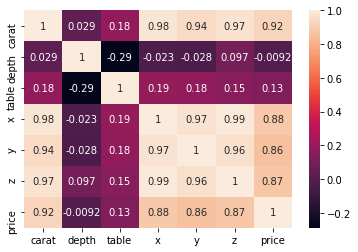

In [7]:
sns.heatmap(df.corr(), annot=True)


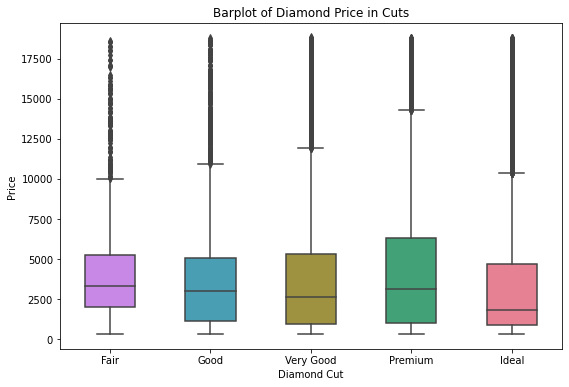

In [8]:
cut_cats = ['Fair','Good','Very Good','Premium','Ideal']
plt.figure(figsize=(9,6))
# Create plot
fig = sns.boxplot(y='price',x='cut',hue='cut',data=df,palette='husl',order=cut_cats,width=0.5,
                  dodge=False)
fig.get_legend().remove()                      # Remove legend
plt.xlabel('Diamond Cut')                      # Horizontal labels
plt.ylabel('Price')                            # Vertical labels

plt.show(fig)

In [9]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997
...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,H,VS2,61.3,61.0,7.46,7.39,4.55,11708
40341,0.36,Ideal,D,SI1,60.6,56.0,4.58,4.63,2.79,619
40342,0.57,Very Good,I,VS2,62.2,55.0,5.33,5.34,3.32,1267
40343,1.01,Very Good,F,IF,59.6,62.0,6.47,6.56,3.88,9965


In [10]:
X = np.array(df[['carat',"depth", 'table']])
y = np.array(df["price"])
X.shape

(40345, 3)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
predictions = model.predict(X_test)
print(predictions)

[7740.22904268 4490.85953747  214.46604098 ... -881.76817202 5558.36369032
 1832.1809642 ]


In [15]:
np.sqrt(mean_squared_error(y_test, predictions))

1517.9849945531614

In [16]:
X_pred = pd.read_csv("diamonds_test.csv", index_col = 0)
X_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [17]:
X_pred = np.array(X_pred[['carat',"depth", 'table']])

In [18]:
predictions_submit = model.predict(X_pred)
predictions_submit

array([  419.2911124 ,   324.41947883, 10191.61209675, ...,
        9213.75290921, 10923.58568666,   140.62735151])

In [19]:
y_test

array([6793, 3340,  590, ...,  505, 5301, 2467], dtype=int64)

In [20]:
np.sqrt(mean_squared_error(y_test, predictions_submit))

ValueError: Found input variables with inconsistent numbers of samples: [8069, 13449]

In [21]:
#Modelo 2 -- Encoding
def codi(df):
    '''
    Esta función da valores numéricos a las columnas cut, color y clarity
    '''
    cols = ['cut', 'color', 'clarity']
    for col in cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype('str'))
    return df
codi(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  int32  
 2   color    40345 non-null  int32  
 3   clarity  40345 non-null  int32  
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.9 MB


<AxesSubplot:>

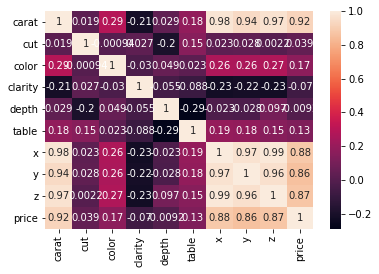

In [22]:
sns.heatmap(df.corr(), annot=True)

In [23]:
X = np.array(df[['carat','cut', 'color', 'clarity']])
y = np.array(df["price"])

X.shape

(40345, 4)

In [24]:
#Modelos 2 -- Linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 153)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

[17999.97635873  3216.43618479  4274.65709577 ...  9988.18599272
  2529.17192129  7840.41540271]
RMSE: 1365.802459388263


In [25]:
X_pred = pd.read_csv("diamonds_test.csv", index_col=0)
X_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [26]:
codi(X_pred)


,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2,4,3,60.0,56.0,4.41,4.43,2.65
1,0.34,2,0,1,62.1,57.0,4.52,4.46,2.79
2,1.57,4,5,5,60.3,58.0,7.58,7.55,4.56
3,0.31,2,4,5,61.8,57.0,4.32,4.36,2.68
4,1.51,1,5,6,64.0,60.0,7.26,7.21,4.63
...,...,...,...,...,...,...,...,...,...
13444,1.05,2,2,3,60.3,55.0,6.55,6.68,3.99
13445,0.27,4,3,4,61.9,56.0,4.13,4.16,2.56
13446,1.50,3,0,5,61.8,60.0,7.30,7.37,4.53
13447,1.70,3,2,3,60.2,61.0,7.79,7.68,4.66


In [27]:
pred_x = np.array(X_pred[['carat','cut', 'color', 'clarity']])

In [28]:
predictions_submit = model.predict(pred_x)
predictions_submit

array([ -862.50735773,  -107.47027209, 10196.74079363, ...,
       10854.87835632, 11373.48109533,   805.37109234])

In [29]:
sample = pd.read_csv("sample_submission.csv")
submission = pd.DataFrame({"id": range(len(predictions_submit)), "price": predictions_submit})

In [30]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission3.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [31]:
chequeator(submission)

You're ready to submit!


In [32]:
#Modelo 3 Catboost

In [33]:
import numpy as np
from catboost import Pool, CatBoostRegressor
# initialize Pool
train_pool = Pool(X_train, 
                  y_train)
test_pool = Pool(X_test)

# specify the training parameters 
model = CatBoostRegressor(iterations=2, 
                          depth=2, 
                          learning_rate=1, 
                          loss_function='RMSE')
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
preds = model.predict(test_pool)
print(preds)
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))


0:	learn: 1831.1297733	total: 688ms	remaining: 688ms
1:	learn: 1668.5380334	total: 701ms	remaining: 0us
[12056.27623264  1444.51685509  1444.51685509 ... 12056.27623264
  2636.39811025  7131.71187101]
RMSE: 1648.3838807985935


In [34]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,2,4,5,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,4,0,7,64.0,56.0,4.14,4.17,2.66,532
2,0.42,3,2,4,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,2,4,1,61.1,57.0,4.16,4.12,2.53,600
4,1.10,1,3,2,63.4,57.0,6.52,6.55,4.14,4997
...,...,...,...,...,...,...,...,...,...,...
40340,1.55,3,4,5,61.3,61.0,7.46,7.39,4.55,11708
40341,0.36,2,0,2,60.6,56.0,4.58,4.63,2.79,619
40342,0.57,4,5,5,62.2,55.0,5.33,5.34,3.32,1267
40343,1.01,4,2,1,59.6,62.0,6.47,6.56,3.88,9965


In [35]:
X.shape

(40345, 4)

In [36]:
#Modelo 4 CasboostRegressor
from catboost import Pool, CatBoostRegressor
# Initialize CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 15)
model = CatBoostRegressor(iterations=3,
                          learning_rate=1,
                          depth=3)
# Fit model
model.fit(X_train, y_train)
# Get predictions
preds = model.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))

0:	learn: 1716.0634793	total: 16.3ms	remaining: 32.6ms
1:	learn: 1423.7115366	total: 74.3ms	remaining: 37.1ms
2:	learn: 1281.0226595	total: 132ms	remaining: 0us
RMSE: 1278.249882561811


In [37]:
'''
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# define model
model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
# define search
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
'''

"\nfrom sklearn.linear_model import Ridge\nfrom sklearn.model_selection import RepeatedKFold\nfrom sklearn.model_selection import GridSearchCV\n\n# define model\nmodel = Ridge()\n# define evaluation\ncv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)\n# define search space\nspace = dict()\nspace['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']\nspace['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]\nspace['fit_intercept'] = [True, False]\nspace['normalize'] = [True, False]\n# define search\nsearch = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)\n# execute search\nresult = search.fit(X, y)\n# summarize result\nprint('Best Score: %s' % result.best_score_)\nprint('Best Hyperparameters: %s' % result.best_params_)\n"

In [58]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedStratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 153)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

modelsvr = SVR()

grid_search = GridSearchCV(estimator=modelsvr, param_grid = param, 
                      cv = cv, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)



Fitting 30 folds for each of 144 candidates, totalling 4320 fits
C:\Users\marin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\marin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\marin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [1]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

NameError: name 'clf' is not defined

In [ ]:
svr_gs